In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
#Data Exploration with Charts.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#Loading Tips dataset from the seaborn library by using load_dataset().
Tips=sb.load_dataset("tips")
Tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
#Looking at all the columns of the Tips Dataset.
Tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
#Looking at the Structure of the Dataset.
Tips.info()
#We can see that there are 4 numeric columns and 3 categorical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
#Let's see that any null values are present in our choosen dataset.
Tips.isnull().sum()
#There are no null values in the dataset.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
#We seen that our above dataframe contains 4 numeric columns. so, we can only apply descriptive statistics on
#that 4 columns.
#Let's Describe the DataFrame.
Tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#Let's Start Analyzing the data.
#1st we check the day column to identify that on which day the customers are rushing to the shop.
Tips['day'].unique()
#We can see that only SUN, SAT, THURS, and FRI the customers are coming.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [8]:
#Above we seen that unique gives the what are the unique values present.
#No let's find out how many unique values are present in the each column. we can also apply it for single column.
#But the difference is that nunique() gives the count of unique values and unique() gives the values that were unique.
Tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [9]:
#Now we we seen that counts of unique values and what are unique values present in the dataframe.
#Now let's see the how many values are present in each unique category from a column.
Days=Tips['day'].value_counts()
Days

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
#We can't plot a simple bar graph for single column so if we need we can convert it to dataframe and reset the index.
plt.bar(Days)

TypeError: ignored

In [11]:
Days=pd.DataFrame(Days)
print(Days)
'''
As we are converting to the dataframe we get an index by default but here we are converting to dataframe in addition
of value counts column but the column name is not specified so the names of the columns are exchanged so day
column is shifted to index so now the index values will be the day values and day column is of day values.
'''
#So we use reset_index() method to get index values as integers. it's nothing but we are resetting the index.
Days.reset_index(inplace=True)
Days

      day
Sat    87
Sun    76
Thur   62
Fri    19


,index,day
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


Index(['index', 'day'], dtype='object')


<BarContainer object of 4 artists>

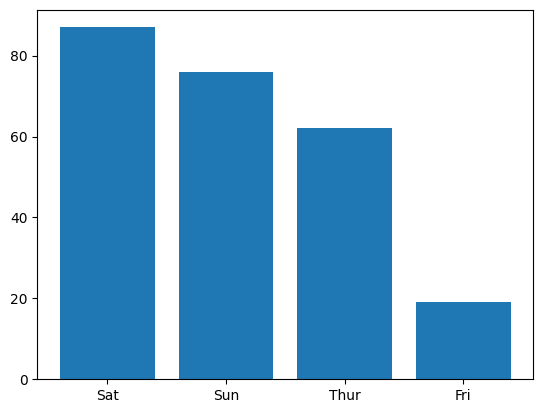

In [12]:
#Now we are having index as unique column and week days named with index column.
print(Days.columns)
'''
The plot function in Matplotlib is a versatile method to create various types of plots such as line plots, scatter
 plots, bar plots, etc. It can accept a variety of parameters to customize the plot.
'''
plt.bar(Days['index'], Days['day'])

<Axes: xlabel='index'>

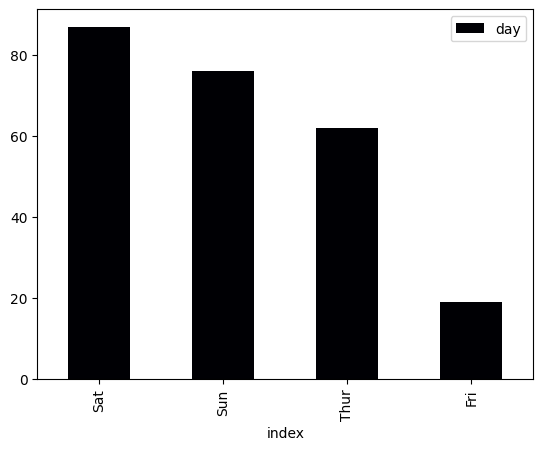

In [13]:
'''
A colormap is a mapping between a range of colors and a range of values. In data visualization, colormaps are used
to represent numerical data using colors. Colormaps can be used to represent a wide range of data types, including
continuous data, discrete data, and categorical data. In Python's Matplotlib library, colormaps can be applied to
various plots, such as scatter plots, line plots, and heatmaps, using the cmap parameter. Matplotlib provides a
 wide range of built-in colormaps that can be used for different types of data and visualization purposes.
'''
Days.plot(kind='bar', x='index', y='day', colormap='inferno')

<Axes: xlabel='index'>

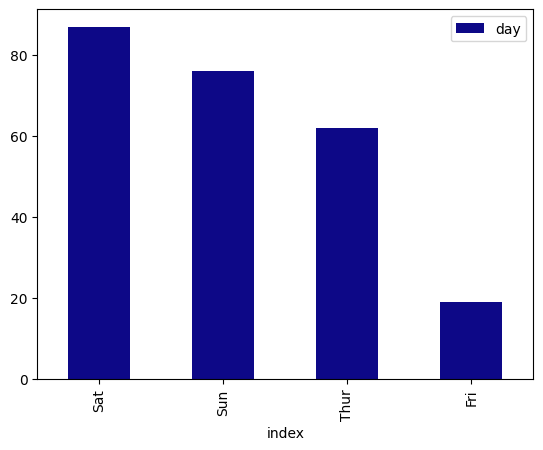

In [14]:
Days.plot(kind='bar', x='index', y='day', colormap='plasma')

<Axes: ylabel='day'>

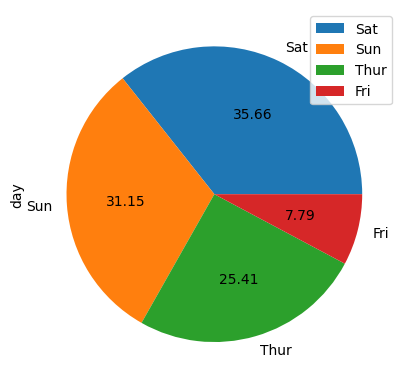

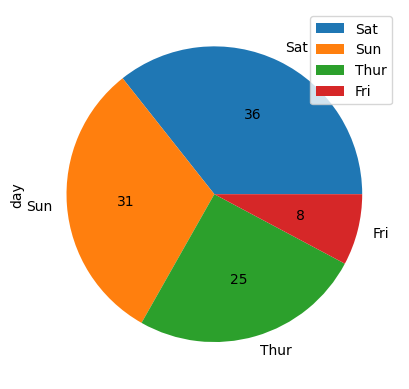

In [15]:
'''
The autopct parameter in the plot() function is used to format the numeric labels of a pie chart. Specifically,
autopct stands for "auto percentage" and is used to specify the format of the numerical labels on the pie chart as
percentages. The format is specified using Python's string formatting syntax. For example, autopct='%1.2f' means
that the numeric labels will be formatted with two decimal places.
'''
Days.plot(kind='pie', y='day', labels=Days['index'], autopct='%1.2f')
Days.plot(kind='pie', y='day', labels=Days['index'], autopct='%.f')

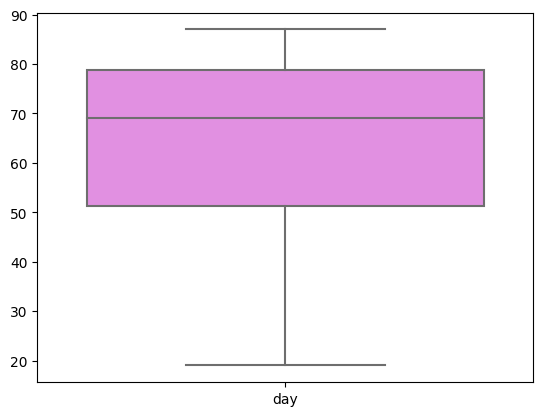

In [16]:
#Boxplot for Days DataFrame.
sb.boxplot(Days, color='violet')
plt.show()

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
total_bill    float64
tip           float64
size            int64
dtype: object


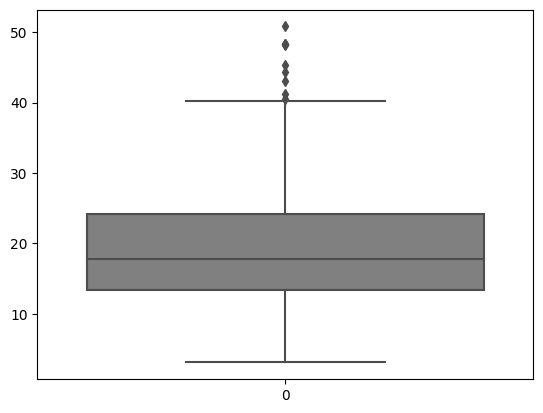

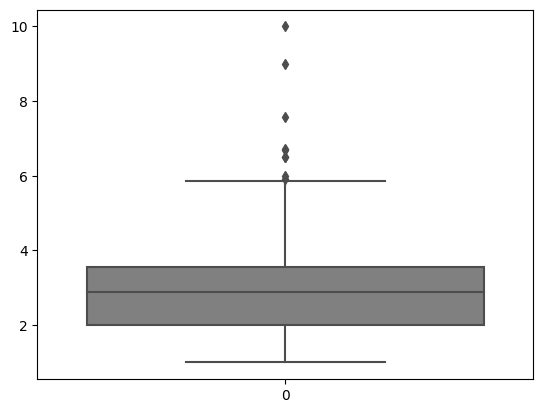

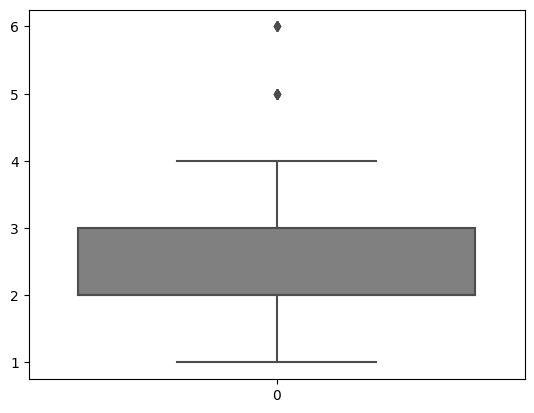

In [17]:
#Subsetting numeric columns
tips_num=Tips.select_dtypes(exclude='category')
print(Tips.dtypes)
print(tips_num.dtypes)
for column in tips_num:
  plt.figure()
  sb.boxplot(tips_num[column], color='grey')

<Axes: >

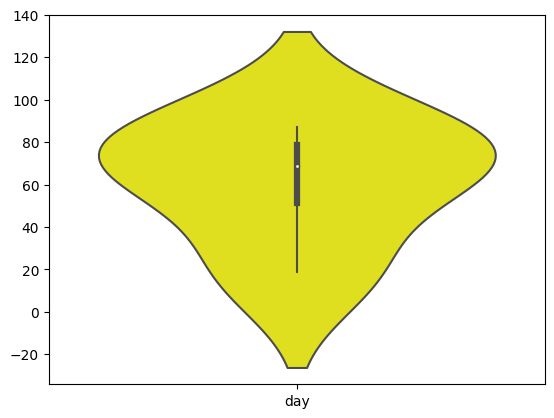

In [18]:
#Violin Plot
sb.violinplot(Days, color='yellow')

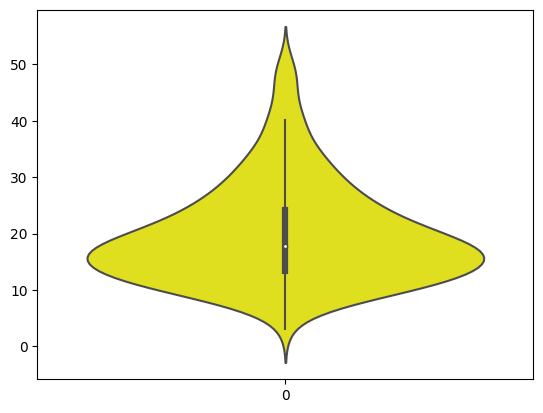

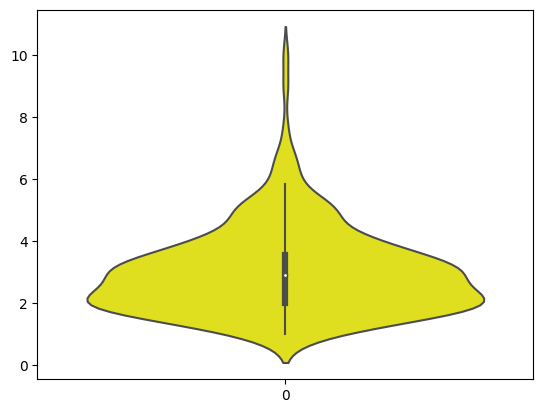

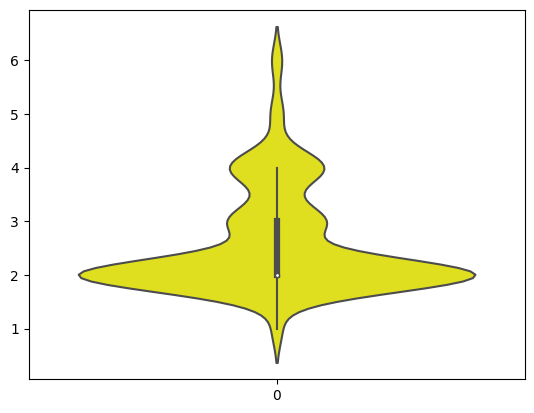

In [19]:
#Violin Plot all Columns
for column in tips_num:
  plt.figure()
  sb.violinplot(tips_num[column], color='yellow')

10.0 50.81


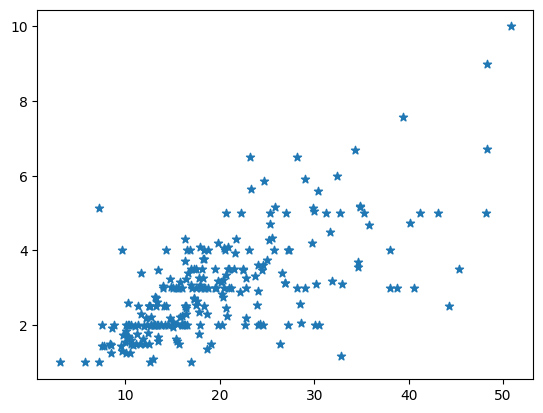

In [20]:
#Let's check the relationship between the bill of the order and the Tip given to the order.
#Scatterplot by using matplotlib
'''A scatter plot is a useful graphical tool that can be used to show the relationship between two variables.
It is particularly useful when we want to explore the relationship between two continuous variables, such as height
and weight or age and income.

By plotting the values of the two variables on the x and y axes of the scatter plot, we can quickly see if there
is any relationship between them. For example, we can determine if the two variables are positively or negatively
correlated, or if there is no correlation at all. Scatter plots can also be used to identify outliers and to
visualize patterns in the data. Overall, a scatter plot is a powerful tool for exploring the relationship between
two variables and gaining insights into the data.
'''
plt.scatter(Tips['total_bill'], Tips['tip'], marker='*')
print(Tips['tip'].max(), Tips['total_bill'].max())

<Axes: xlabel='total_bill', ylabel='tip'>

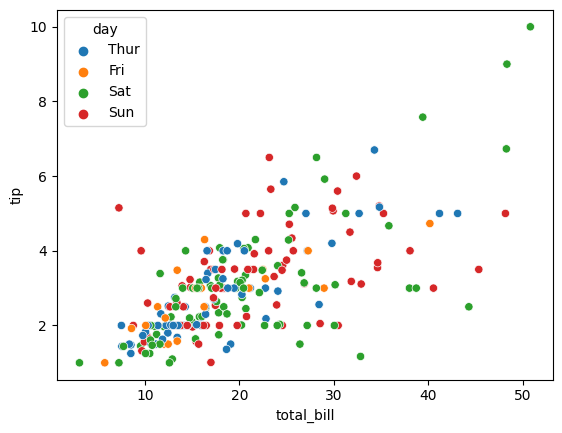

In [21]:
#Scatterplot by using seaborn.
'''
In a scatter plot, hue is a parameter that can be used to differentiate points based on a categorical variable.
It adds an additional dimension to the plot by using different colors or markers to represent different groups.
For example, if we have a scatter plot of two continuous variables, say height and weight, we can use hue to
distinguish between males and females. In this case, the hue parameter would take a
categorical variable (e.g., gender) and assign different colors to the points based on the gender group.
'''
'''In this data the we are taking the column 'day' to differentiate the total_bill and tips to differentiate by a
different color to identify on which day the how much bill is paid and how much tip is paid.
'''
sb.scatterplot(x='total_bill', y='tip', data=Tips, hue='day')
#we can see that on saturday more tip and more bill was getting.

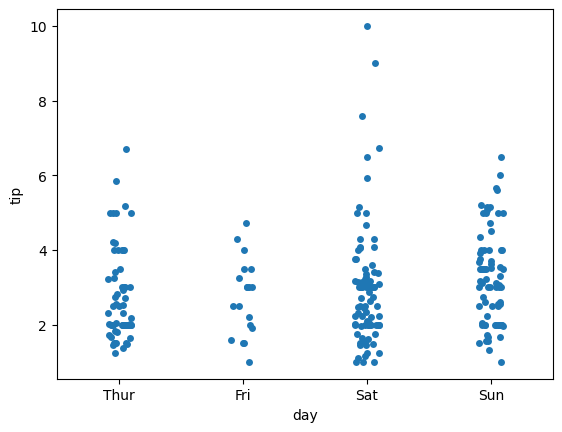

In [22]:
#Stripplot
'''
A strip plot is a way of plotting data points vertically along a number line. It can be created using the
stripplot() function in seaborn library.

The stripplot() function can be used to create a scatterplot with one categorical variable and one continuous
variable. It draws a scatterplot where one variable is categorical and the other is continuous. Each data point is
shown as a dot along the vertical line corresponding to its value.
'''
#Here we are plotting by different categories with day column.
sb.stripplot(x='day', y='tip', data=Tips)
plt.show()

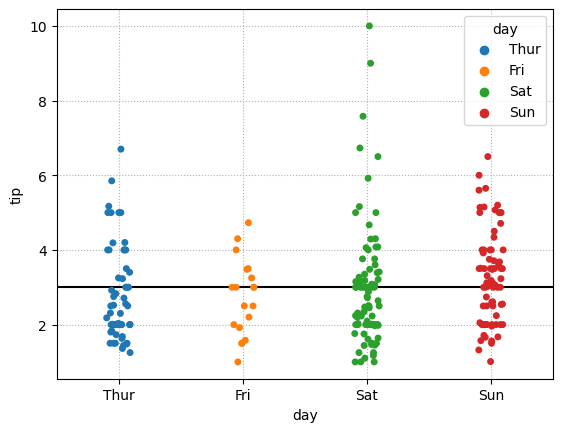

In [23]:
#Here we are plotting by using hue to differentiate each one with a different color.
sb.stripplot(x='day', y='tip', data=Tips, hue='day')
#here we are using grid to form blocks.
plt.grid(linestyle=':')
#let's make the data to divide them above mean and below mean value.
#let's draw a line called axhline.
#axhline is a function in Matplotlib that can be used to add a horizontal line to a plot.
#It takes a y-value as its argument.
#now let's take y axis column and take the mean value to separate the values into two by drawing a horizontal line.
#now we can identify how much tip we are getting on average visualizly.
plt.axhline(Tips['tip'].mean(), color='black')

'\nPoint placement: In stripplot, all the points belonging to a category are stacked vertically and overlap each other,\nwhich can make it difficult to see the distribution of points. In contrast, swarmplot attempts to avoid overlapping\nby placing the points in a way that minimizes the overlap while still keeping the points in order.\n'

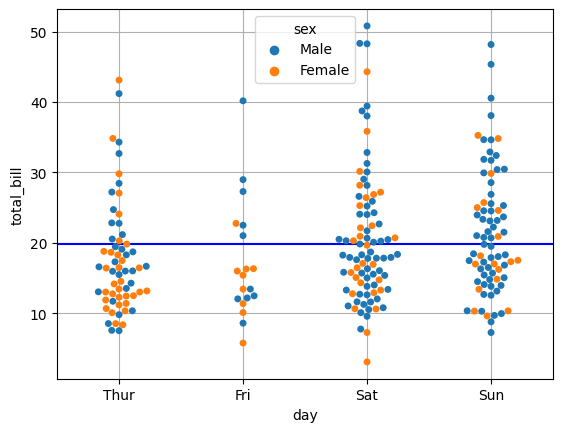

In [24]:
#swarmplot
'''
swarmplot is a categorical scatterplot in seaborn library that displays the distribution of categorical data with
non-overlapping points. It arranges the categorical variable on the y-axis and a numerical variable on the x-axis,
and then plots the data points such that they do not overlap. This makes it useful in scenarios where we want to
visualize the distribution of a large dataset where data points overlap with each other in other categorical
scatterplots like stripplot.
'''
#here we are differentiating the plots by sex column
sb.swarmplot(x='day', y='total_bill', data=Tips, hue='sex')
plt.grid()
plt.axhline(Tips['total_bill'].mean(), color='blue')
#The only difference between swarmplot and stripplot is:
'''
Point placement: In stripplot, all the points belonging to a category are stacked vertically and overlap each other,
which can make it difficult to see the distribution of points. In contrast, swarmplot attempts to avoid overlapping
by placing the points in a way that minimizes the overlap while still keeping the points in order.
'''

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<ipython-input-25-4cef8638b9ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(Tips.corr())


<Axes: >

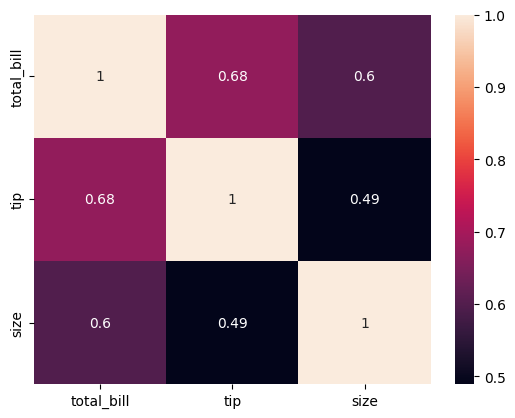

In [25]:
#Let's check the correlation between each two columns.
print(Tips.corr())
sb.heatmap(tips_num.corr(), annot=True)
#We can see that there morecorrelation between the total_bill and tip.